<h1><center>Data Visualization with Seaborn</center></h1>

## Introduction: Understanding Social Justice with Computing

Social justice is the relation of balance between individuals and society measured by comparing distribution of wealth differences, from personal liberties to fair privilege opportunities. 

Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.
It's difficult to find reliable data from before this period, as police killings haven't been comprehensively documented, and the statistics on police brutality are much less available. As a result, a vast number of cases go unreported.

The Washington Post is tracking more than a dozen details about each killing - including the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. They have gathered this information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

## Section 1: Data Reading and Data Preprocessing

### Import the necessary libraries including Pandas, Matplotlib and Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Read in the data from the given URL as a DataFrame

In [2]:
data_url = 'https://raw.githubusercontent.com/BlueJayADAL/CS121/master/datasets/PoliceKillingsUS.csv'

In [3]:
df = pd.read_csv(data_url, index_col = 0)



### Show the top 5 data entries and DataFrame information

In [4]:

df.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,poverty_rate,median_income,percent_completed_hs
0,3.0,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,28.6,37072.0,80.1
1,4.0,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,14.9,65765.0,88.1
2,890.0,Phyllis Ilene Jepsen,02/10/15,shot,knife,55.0,F,W,Aloha,OR,True,other,Not fleeing,False,14.9,65765.0,88.1
3,5.0,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,17.3,45947.0,87.5
4,765.0,Nicholas Garner,22/08/15,shot,vehicle,26.0,M,W,Wichita,KS,False,attack,Car,False,17.3,45947.0,87.5


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2684
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2039 non-null   float64
 1   name                     2039 non-null   object 
 2   date                     2039 non-null   object 
 3   manner_of_death          2039 non-null   object 
 4   armed                    2039 non-null   object 
 5   age                      2039 non-null   float64
 6   gender                   2039 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2039 non-null   object 
 9   state                    2039 non-null   object 
 10  signs_of_mental_illness  2039 non-null   bool   
 11  threat_level             2039 non-null   object 
 12  flee                     2039 non-null   object 
 13  body_camera              2039 non-null   bool   
 14  poverty_rate            

### Check out the missing data

In [6]:

df.isnull().sum()


id                          0
name                        0
date                        0
manner_of_death             0
armed                       0
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                        0
body_camera                 0
poverty_rate                0
median_income              11
percent_completed_hs        0
dtype: int64

### Impute the missing data in the `median_income` column by using the average age. Ensure the change is `inplace`.

In [7]:

avg_median_income = df['median_income'].mean()

df['median_income'].fillna(value = avg_median_income, inplace = True)

In [8]:
# Check out missing data again after imputation

df.isnull().sum()


id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
poverty_rate               0
median_income              0
percent_completed_hs       0
dtype: int64

## Section 2: Data Visualization

### Basically, everything you can do with pandas built-in visualizations, you can now do it with Seaborn. There are a few exceptions, and "Pie Graph" is one of that. Most of the time, Seaborn does a better job in terms of coloring and ease-of-use. 
### Use Pandas built-in visualization to show a pie graph of total number of people killed by race

In [9]:
# First step, count the number of ocurrences for each race

df['race'].value_counts()


W    1033
B     532
H     392
A      32
N      25
O      25
Name: race, dtype: int64

<AxesSubplot:ylabel='race'>

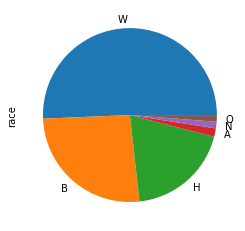

In [10]:
# Second, use the results from last step to plot a pie graph

df['race'].value_counts().plot(kind = 'pie')


### Show the same as above but with a bar graph

<AxesSubplot:title={'center':'Total number of people killed by race'}, xlabel='race', ylabel='count'>

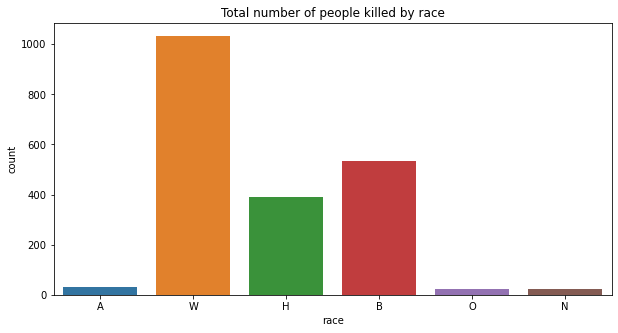

In [11]:
plt.figure(figsize=(10,5))
plt.title("Total number of people killed by race")

sns.countplot(data = df, x = 'race')


<AxesSubplot:>

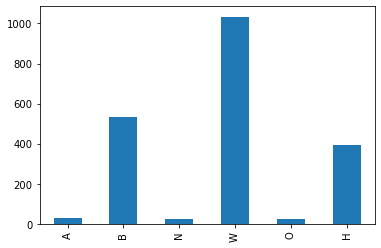

In [17]:
df['race'].value_counts(sort = False).plot(kind = 'bar')

### Quiz: Show a bar graph of the number of fatal shootings in each state

<AxesSubplot:title={'center':'Total number of fatal shootings in each state'}, xlabel='state', ylabel='count'>

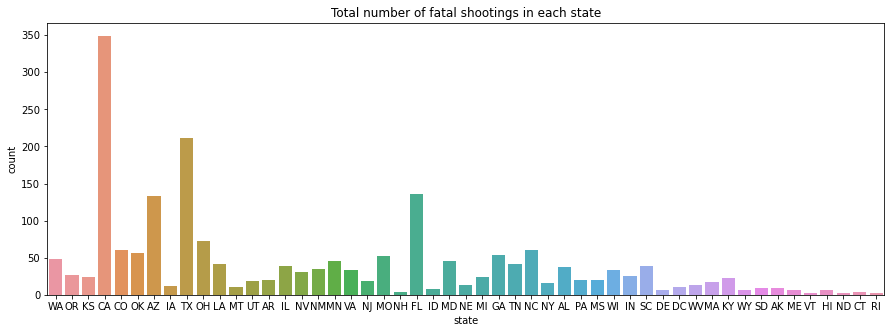

In [12]:
plt.figure(figsize=(15,5))
plt.title("Total number of fatal shootings in each state")

sns.countplot(data = df, x = 'state')


### Find the top 10 most dangerous cities with a bar graph

Hint: using `countplot()` to directly plot with `x='city'` would end up having too many cities. Therefore we need to clean the data a little bit.

In [13]:
# First, use Pandas operations to find the top 10 most dangerous cities
top_10_danger = df['city'].value_counts().head(10)


top_10_danger

Los Angeles    35
Cottonwood     33
Phoenix        28
Houston        24
Chicago        22
Austin         18
Las Vegas      17
Mesquite       16
Morris         16
Burbank        16
Name: city, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'Cottonwood'),
  Text(2, 0, 'Phoenix'),
  Text(3, 0, 'Houston'),
  Text(4, 0, 'Chicago'),
  Text(5, 0, 'Austin'),
  Text(6, 0, 'Las Vegas'),
  Text(7, 0, 'Mesquite'),
  Text(8, 0, 'Morris'),
  Text(9, 0, 'Burbank')])

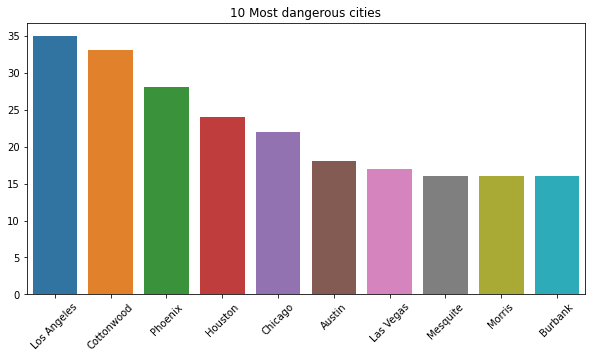

In [14]:
# Second, use a barplot to visualize the cities vesus their count

plt.figure(figsize=(10,5))
plt.title('10 Most dangerous cities')

sns.barplot(x = top_10_danger.index, y = top_10_danger.values, data = df)

plt.xticks(rotation = 45)

### Use Seaborn's histogram to show the age distribution of all victims

<AxesSubplot:ylabel='Frequency'>

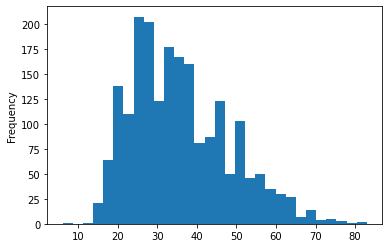

In [18]:
# pandas
df['age'].plot(kind = 'hist', bins = 30)


<AxesSubplot:xlabel='age', ylabel='Count'>

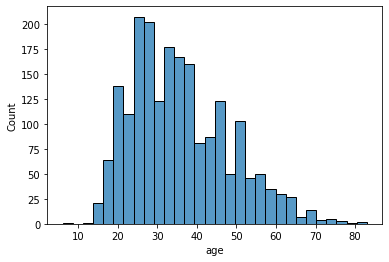

In [19]:
# seaborn
sns.histplot(data = df['age'], bins = 30)

### Quiz: Use Seaborn's histogram to show the `median_income` distribution of all victims. Checkout the `stat` parameter in the function and switch to `frequency` instead of `count`. 

<AxesSubplot:xlabel='median_income', ylabel='Frequency'>

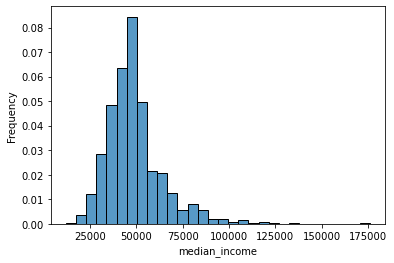

In [20]:
sns.histplot(data = df, x = 'median_income', bins = 30, stat = 'frequency')



### Show a scatter plot of `poverty_rate` versus `percent_completed_hs`

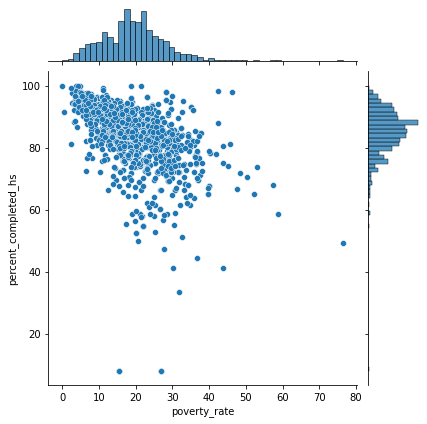

In [22]:
sns.jointplot(data = df, x = 'poverty_rate', y = 'percent_completed_hs', kind = 'scatter')




### Show a scatter plot of `poverty_rate` versus `percent_completed_hs`, but use hexagons instead of points

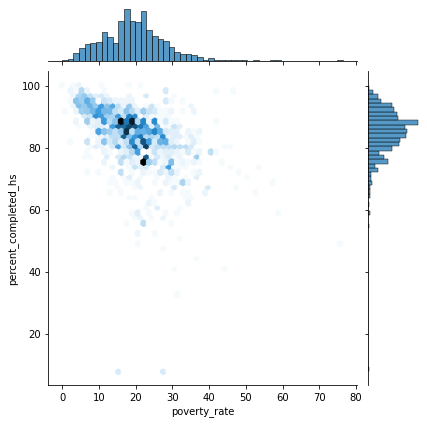

In [21]:
sns.jointplot(data = df, x = 'poverty_rate', y = 'percent_completed_hs', kind = 'hex')



### Show a scatter plot of `poverty_rate` versus `percent_completed_hs`, and color-code the points based off of `race`

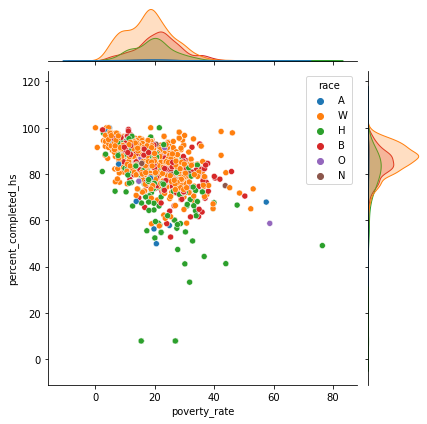

In [32]:
sns.jointplot(data = df, x = 'poverty_rate', y = 'percent_completed_hs', hue = 'race')



###  Quiz: Show a scatter plot of `poverty_rate` versus `median_income`, and color-code the points based off of `gender`

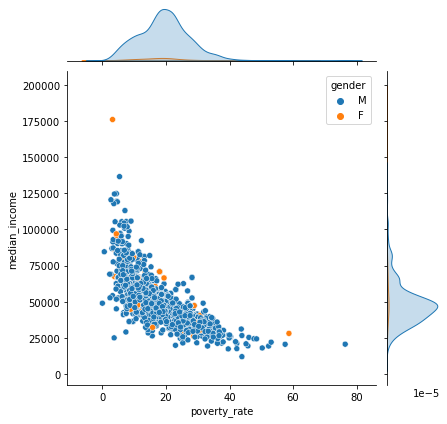

In [31]:
sns.jointplot(data = df, x = 'poverty_rate', y = 'median_income', hue = 'gender')



### Create a `pairplot` with all numeric columns from the dataset: `'age'`, `'poverty_rate'`, `'median_income'`, `'percent_completed_hs'`.

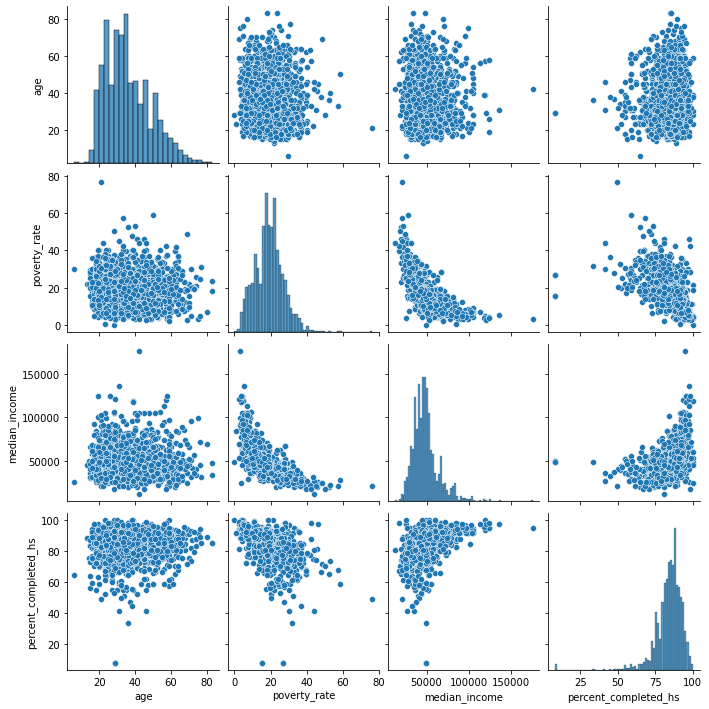

In [37]:
sns.pairplot(data = df[['age', 'poverty_rate','median_income', 'percent_completed_hs']])



### Show a box plot of age distribution for each gender.

A boxplot is a graph that gives you a good indication of how the values in the data are spread out. Although boxplots may seem primitive in comparison to a histogram or density plot, they have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets.
![boxplot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

Boxplots are a standardized way of displaying the distribution of data based on a five number summary ("minimum", first quartile (Q1), median, third quartile (Q3), and "maximum").

+ **median (Q2/50th Percentile)**: the middle value of the dataset.
+ **first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the "minimum") and the median of the dataset.
+ **third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.
+ **interquartile range (IQR)**: 25th to the 75th percentile.
+ **whiskers** (shown in blue)
+ **outliers** (shown as green circles)
+ **"maximum"**: Q3 + 1.5*IQR
+ **"minimum"**: Q1 -1.5*IQR

<AxesSubplot:xlabel='gender', ylabel='age'>

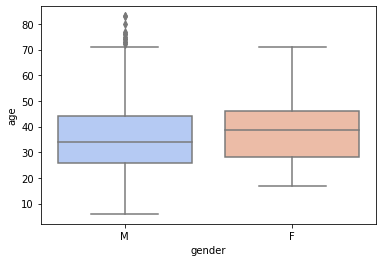

In [43]:
sns.boxplot(data = df, x = 'gender', y = 'age', palette = 'coolwarm')



### Show a box plot of age distribution for each gender, then color code based off of `manner_of_death`

<AxesSubplot:xlabel='gender', ylabel='age'>

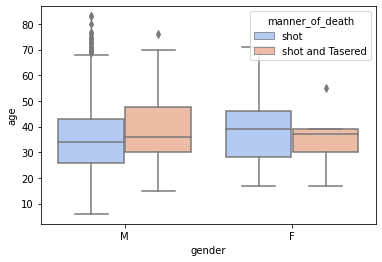

In [44]:
sns.boxplot(data = df, x = 'gender', y = 'age', hue = 'manner_of_death', palette = 'coolwarm')


### Show a violin plot of `median_income` distribution for each `race`. 

<AxesSubplot:xlabel='race', ylabel='median_income'>

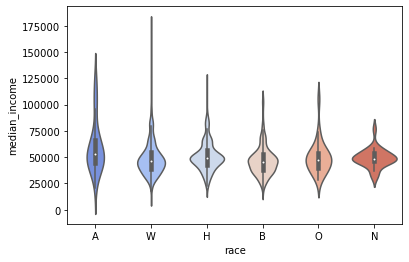

In [47]:
sns.violinplot(data = df, x = 'race', y = 'median_income', palette = 'coolwarm')

### Show a violin plot of `median_income` distribution for each `race`. Color-code based off of `gender`.

<AxesSubplot:xlabel='race', ylabel='median_income'>

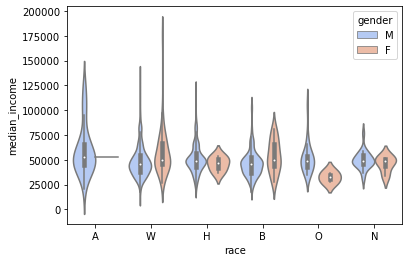

In [48]:
sns.violinplot(data = df, x = 'race', y = 'median_income', palette = 'coolwarm', hue = 'gender')



<AxesSubplot:xlabel='race', ylabel='median_income'>

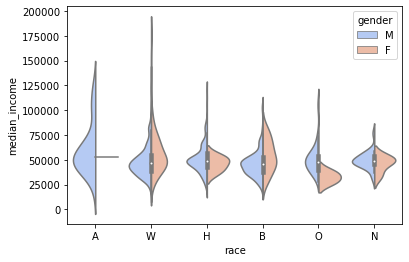

In [49]:
# Another way that combines both genders into a single violin
sns.violinplot(data = df, x = 'race', y = 'median_income', palette = 'coolwarm', hue = 'gender', split = True)



### Use a heatmap to visualize the correlation among all numeric columns.

In [53]:
data_corr = df[['id','age', 'poverty_rate', 'median_income', 'percent_completed_hs']].corr()


data_corr

,id,age,poverty_rate,median_income,percent_completed_hs
id,1.000000,0.016786,0.043112,-0.024049,0.024370
age,0.016786,1.000000,-0.067968,0.029671,0.059057
poverty_rate,0.043112,-0.067968,1.000000,-0.730740,-0.481993
median_income,-0.024049,0.029671,-0.730740,1.000000,0.378155
percent_completed_hs,0.024370,0.059057,-0.481993,0.378155,1.000000


<AxesSubplot:>

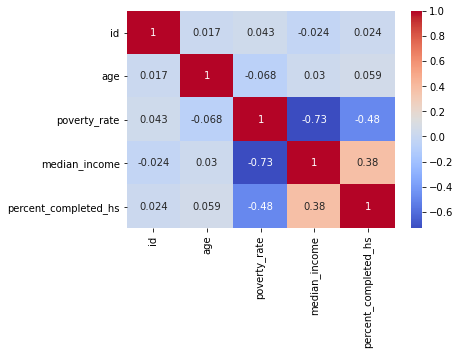

In [55]:
sns.heatmap(data = data_corr, annot = True, cmap = 'coolwarm')
